# Notebook for testing mnist when using fuzzy class labels

In [1]:
%load_ext tensorboard
import datetime, os

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
print(keras.backend.image_data_format())

channels_last


In [2]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=2019, stratify=y_train)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 28, 28, 1)
42000 train samples
18000 validation samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [5]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=[tensorboard_callback])
## Let's use Tensorboard to keep track of things
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
  1/329 [..............................] - ETA: 0s - loss: 2.3275 - accuracy: 0.0547WARNING:tensorflow:From C:\Users\jj364\Documents\deep_learning\dl\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
329/329 [==============================] - 4s 13ms/step - loss: 2.2906 - accuracy: 0.1352 - val_loss: 2.2672 - val_accuracy: 0.2496
Epoch 2/20
329/329 [==============================] - 3s 10ms/step - loss: 2.2584 - accuracy: 0.2019 - val_loss: 2.2291 - val_accuracy: 0.3661
Epoch 3/20
329/329 [==============================] - 3s 10ms/step - loss: 2.2193 - accuracy: 0.2777 - val_loss: 2.1842 - val_accuracy: 0.4754
Epoch 4/20
329/329 [==============================] - 4s 11ms/step - loss: 2.1726 - accuracy: 0.3424 - val_loss: 2.1278 - val_accuracy: 0.5648
Epoch 5/20
329/329 [=========================

In [4]:
%tensorboard --logdir logs  # Start Tensorboard if you want to see graphical training results

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 21100.

## Let's split the data into two train/val splits with a test set

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# n_samples = np.zeros(10)
# for i in range(x_test.shape[0]):
#     result = model.predict(np.expand_dims(x_test[i],axis=0))
#     result_val = np.argmax(result)
#     ground_truth = np.argmax(y_test_a[i])
#     uncertainty_matrix[ground_truth,:] += result[0]
#     n_samples[ground_truth] += 1
# print(n_samples)

train_size = 0.7
x_train_a, x_train_b, y_train_a, y_train_b = train_test_split(x_train, y_train, train_size=0.5, random_state=2019, stratify=y_train)
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(x_train_a, y_train_a, train_size=0.7, random_state=325, stratify=y_train_a)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(x_train_b, y_train_b, train_size=0.7, random_state=325, stratify=y_train_b)
x_test, x_test_fin, y_test, y_test_fin = train_test_split(x_test, y_test, train_size=0.5, random_state=325, stratify=y_test)

# I know it's channels last
x_train_a = x_train_a.reshape(x_train_a.shape[0], img_rows, img_cols, 1)
x_val_a = x_val_a.reshape(x_val_a.shape[0], img_rows, img_cols, 1)
x_train_b = x_train_b.reshape(x_train_b.shape[0], img_rows, img_cols, 1)
x_val_b = x_val_b.reshape(x_val_b.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test_fin = x_test_fin.reshape(x_test_fin.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train_a = x_train_a.astype('float32'); x_train_b = x_train_b.astype('float32'); x_val_a = x_val_a.astype('float32'); x_val_b = x_val_b.astype('float32')
x_test = x_test.astype('float32'); x_test_fin = x_test_fin.astype('float32')
x_train_a /= 255; x_train_b /= 255; x_val_a /= 255; x_val_b /= 255
x_test /= 255; x_test_fin /= 255
print('train_a: %i val_a: %i train_b: %i val_b: %i test: %i test_fin: %i' %(x_train_a.shape[0], x_val_a.shape[0], x_train_b.shape[0], x_val_b.shape[0], x_test.shape[0], x_test_fin.shape[0]))

y_train_a = keras.utils.to_categorical(y_train_a, num_classes)
y_val_a = keras.utils.to_categorical(y_val_a, num_classes)
y_train_b = keras.utils.to_categorical(y_train_b, num_classes)
y_val_b = keras.utils.to_categorical(y_val_b, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_test_fin = keras.utils.to_categorical(y_test_fin, num_classes)

train_a: 21000 val_a: 9000 train_b: 21000 val_b: 9000 test: 5000 test_fin: 5000


### Reuse model from before to train
Use fewer epochs

In [7]:
model_set_vals = Sequential()
model_set_vals.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_set_vals.add(Conv2D(64, (3, 3), activation='relu'))
model_set_vals.add(MaxPooling2D(pool_size=(2, 2)))
model_set_vals.add(Dropout(rate=0.25))
model_set_vals.add(Flatten())
model_set_vals.add(Dense(128, activation='relu'))
model_set_vals.add(Dropout(rate=0.5))
model_set_vals.add(Dense(num_classes, activation='softmax'))

model_set_vals.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_set_vals.fit(x_train_a, y_train_a,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(x_val_a, y_val_a))
score = model_set_vals.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
165/165 [==============================] - 2s 12ms/step - loss: 2.3172 - accuracy: 0.0907 - val_loss: 2.3051 - val_accuracy: 0.1363
Epoch 2/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2994 - accuracy: 0.1224 - val_loss: 2.2864 - val_accuracy: 0.1832
Epoch 3/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2818 - accuracy: 0.1486 - val_loss: 2.2673 - val_accuracy: 0.1957
Epoch 4/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2645 - accuracy: 0.1802 - val_loss: 2.2473 - val_accuracy: 0.2114
Epoch 5/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2453 - accuracy: 0.2065 - val_loss: 2.2261 - val_accuracy: 0.2376
Epoch 6/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2257 - accuracy: 0.2344 - val_loss: 2.2032 - val_accuracy: 0.2751
Epoch 7/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2023 - accuracy: 0.2691 - val_loss: 2.1775 - val_accuracy: 0.3228

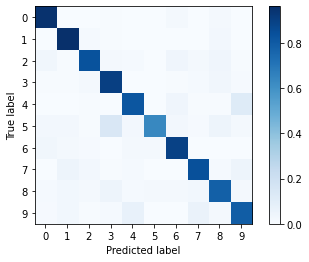

In [30]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = cm/cm.sum(axis=1)
classes = np.arange(0,10,1)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')
plt.show()

In [31]:
y_train_b_nothot = np.ndarray((y_train_b.shape))
for i in range(y_train_b.shape[0]):
    loc = np.argmax(y_train_b[i])
    y_train_b_nothot[i,:] = cm[loc]

In [32]:
model_nothot = Sequential()
model_nothot.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_nothot.add(Conv2D(64, (3, 3), activation='relu'))
model_nothot.add(MaxPooling2D(pool_size=(2, 2)))
model_nothot.add(Dropout(rate=0.25))
model_nothot.add(Flatten())
model_nothot.add(Dense(128, activation='relu'))
model_nothot.add(Dropout(rate=0.5))
model_nothot.add(Dense(num_classes, activation='softmax'))

model_nothot.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_nothot.fit(x_train_b, y_train_b_nothot,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(x_val_b, y_val_b))
score_nothot = model_nothot.evaluate(x_test_fin, y_test_fin, verbose=0)
score_set = model_set_vals.evaluate(x_test_fin, y_test_fin, verbose=0)

Epoch 1/20
165/165 [==============================] - 2s 11ms/step - loss: 2.3001 - accuracy: 0.0991 - val_loss: 2.2852 - val_accuracy: 0.0904
Epoch 2/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2750 - accuracy: 0.1253 - val_loss: 2.2588 - val_accuracy: 0.1737
Epoch 3/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2514 - accuracy: 0.1589 - val_loss: 2.2320 - val_accuracy: 0.3024
Epoch 4/20
165/165 [==============================] - 2s 10ms/step - loss: 2.2275 - accuracy: 0.1958 - val_loss: 2.2038 - val_accuracy: 0.3897
Epoch 5/20
165/165 [==============================] - 2s 11ms/step - loss: 2.2021 - accuracy: 0.2408 - val_loss: 2.1732 - val_accuracy: 0.4789
Epoch 6/20
165/165 [==============================] - 2s 11ms/step - loss: 2.1748 - accuracy: 0.2788 - val_loss: 2.1396 - val_accuracy: 0.5421
Epoch 7/20
165/165 [==============================] - 2s 11ms/step - loss: 2.1453 - accuracy: 0.3191 - val_loss: 2.1031 - val_accuracy: 0.5809

In [33]:
final_score = score = model.evaluate(x_test_fin, y_test_fin, verbose=0)
print('Test loss set: %.5f nothot: %.5f original: %.5f' %(score_set[0],score_nothot[0], final_score[0]))
print('Test accuracy set: %.5f nothot %.5f original: %.5f'%(score_set[1],score_nothot[1], final_score[1]))

Test loss set: 1.49983 nothot: 1.35040 original: 0.62941
Test accuracy set: 0.77940 nothot 0.75580 original: 0.85640
